In [1]:
from allennlp.predictors.predictor import Predictor
import allennlp_models.tagging
from nltk import ParentedTree

In [2]:
predictor = Predictor.from_path("https://storage.googleapis.com/allennlp-public-models/elmo-constituency-parser-2020.02.10.tar.gz")

/Users/ryoheinamiki515/opt/anaconda3/envs/SIGAIDA/lib/python3.8/site-packages/torch/nn/modules/container.py:435: UserWarning: Setting attributes on ParameterList is not supported.
  warnings.warn("Setting attributes on ParameterList is not supported.")


In [27]:
def filt_r(x):
    if x.label() == "S":
        right_siblings = []
        r = x
        while r:
            if r.label() != ".":
                right_siblings.append(r.label())
            r = r.right_sibling()
    else:
        return False
    if right_siblings == ["S", ",", "CC", "S"] or right_siblings == ["S", ":", "S"] or right_siblings == ["S", ",", "S"]:
        return True
    return False

def filt_l(x):
    if x.label() == "S":
        left_siblings = []
        l = x
        while l:
            if l.label() != ".":
                left_siblings.append(l.label())
            l = l.left_sibling()
    else:
        return False
    if left_siblings[::-1] == ["S", ",", "CC", "S"] or left_siblings[::-1] == ["S", ":", "S"] or left_siblings == ["S", ",", "S"]:
        return True
    return False

def extract_independent_clauses(input_sent):
    output = predictor.predict(sentence=input_sent)
    tree_str = output["trees"]
    t = ParentedTree.fromstring(tree_str)
    candidate_nodes = list(t.subtrees(filter=lambda x: filt_r(x) or filt_l(x)))
    for node in candidate_nodes:
        if node.parent() in candidate_nodes:
            candidate_nodes.remove(node.parent())
    sub_sentences = []
    for candidate in candidate_nodes:
        temp = []
        for subtree in candidate:
            temp += subtree.leaves()
        sub_sentences.append(temp)
    sub_sentences = sub_sentences if sub_sentences else [t.leaves()]
    sentences = []
    for sentence in sub_sentences:
        temp = ""
        for i, word in enumerate(sentence):
            if i == 0:
                temp += word[0].title() + word[1:]
            elif word in [".", "!", "?", ",", ";"]:
                temp += word
            else:
                temp += " " + word
        sentences.append(temp)
    return sentences

In [32]:
input_sent = "The cat is tired, but it is still awake; in addition, this is a really long sentence"

In [33]:
extract_independent_clauses(input_sent)

['The cat is tired',
 'It is still awake',
 'In addition, this is a really long sentence']

In [7]:
input_sent = "This fundamental question guides a number of language ﬁelds that pursue three kinds of understanding about language: descriptive, evolutionary and developmental."

In [8]:
extract_independent_clauses(input_sent)

['This fundamental question guides a number of language ﬁelds that pursue three kinds of understanding about language : descriptive, evolutionary and developmental.']

In [9]:
input_sent = "Despite this daunting linguistic variety, however, all languages, no matter how different from each other they may seem (Arabic from American Sign Language from Chinese from English from Spanish from Swahili), share fundamental commonalities, a universal core of very abstract properties."

In [10]:
extract_independent_clauses(input_sent)

['Despite this daunting linguistic variety, however, all languages, no matter how different from each other they may seem Arabic from American Sign Language from Chinese from English from Spanish from Swahili, share fundamental commonalities, a universal core of very abstract properties.']

In [30]:
for sent in example.split("."):
    if not sent:
        continue
    output = extract_independent_clauses(sent)
    if len(output) > 1:
        print(sent, output)        

 The cat is tired, but the dog is still awake; in addition, this is a really long sentence ['The cat is tired', 'The dog is still awake', 'This is a really long sentence']


In [28]:
output

['We will return to this issue in the next section']

In [25]:
output = predictor.predict(sentence=input_sent)
tree_str = output["trees"]
t = ParentedTree.fromstring(tree_str)

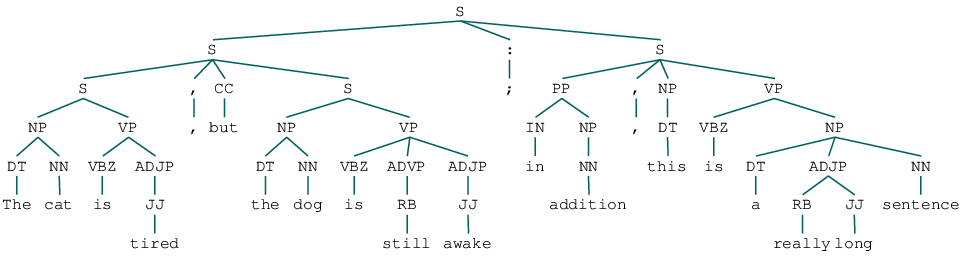

In [26]:
t